# WITH SEABORN

In [217]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

In [218]:
kill = pd.read_csv('../data/PoliceKillingsUS.csv', encoding="windows-1252")

In [219]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [220]:
kill.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [221]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [222]:
kill["manner_of_death"].unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

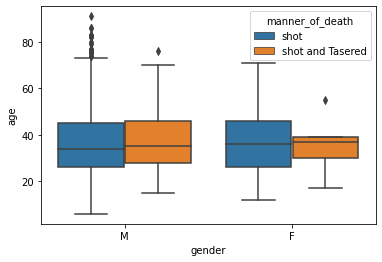

In [223]:
# with seaborn

sns.boxplot(x="gender", y="age", data=kill, hue="manner_of_death");

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

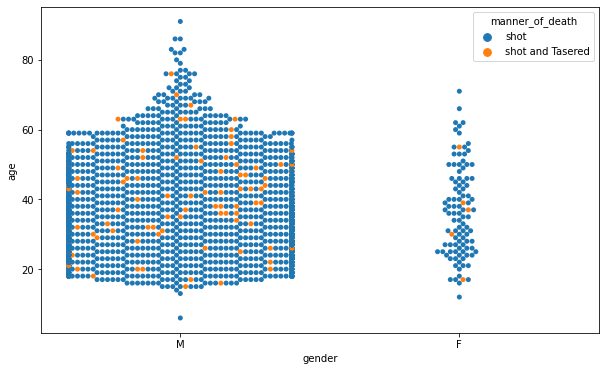

In [224]:
plt.figure(figsize=(10, 6))

sns.swarmplot(x="gender", y="age", hue="manner_of_death", data=kill);

## 2: Plot 12 most dangerous cities

In [225]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [226]:
city_freq = kill["city"].value_counts().head(12)
city_freq

Los Angeles     39
Phoenix         31
Houston         27
Chicago         25
Las Vegas       21
San Antonio     20
Columbus        19
Austin          18
Miami           18
St. Louis       15
Indianapolis    14
Albuquerque     14
Name: city, dtype: int64

In [227]:
dangerous_cities = list(city_freq.index)
dangerous_cities

['Los Angeles',
 'Phoenix',
 'Houston',
 'Chicago',
 'Las Vegas',
 'San Antonio',
 'Columbus',
 'Austin',
 'Miami',
 'St. Louis',
 'Indianapolis',
 'Albuquerque']

In [228]:
city_count = list(city_freq)
city_count

[39, 31, 27, 25, 21, 20, 19, 18, 18, 15, 14, 14]

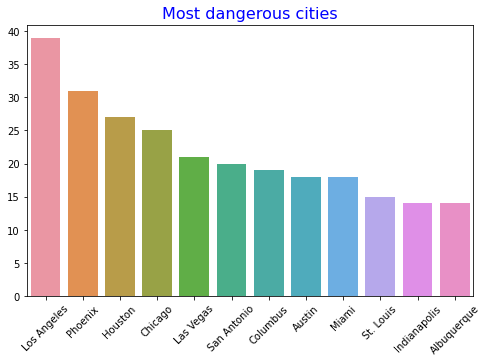

In [229]:
# with seaborn barplot
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(x=dangerous_cities, y=city_count)
ax.set_title("Most dangerous cities", fontsize=16, color= 'b')
plt.xticks(rotation=45)

plt.show()

In [230]:
city_df = kill.loc[kill["city"].isin(dangerous_cities)]
city_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
12,22,Hashim Hanif Ibn Abdul-Rasheed,07/01/15,shot,knife,41.0,M,B,Columbus,OH,True,other,Not fleeing,False
24,46,John Edward O'Keefe,13/01/15,shot,gun,34.0,M,W,Albuquerque,NM,False,attack,Foot,True
32,56,Donte Sowell,15/01/15,shot,gun,27.0,M,B,Indianapolis,IN,False,attack,Foot,False
40,75,Pablo Meza,17/01/15,shot,gun,24.0,M,H,Los Angeles,CA,False,attack,Not fleeing,False
48,90,Isaac Holmes,21/01/15,shot,gun,19.0,M,B,St. Louis,MO,False,attack,Not fleeing,False


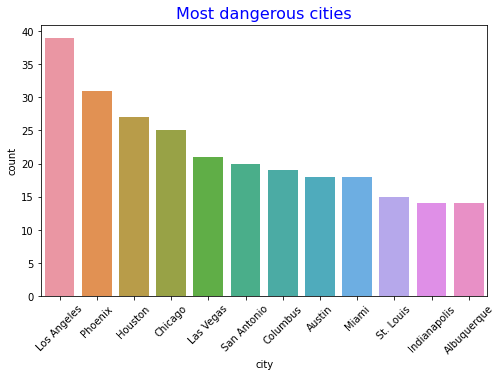

In [231]:
# with seaborn countplot

fig, ax =plt.subplots(figsize=(8,5))

sns.countplot(x="city", data=city_df, order = dangerous_cities)
ax.set_title("Most dangerous cities", fontsize=16, color= 'b')
plt.xticks(rotation=45)

plt.show()

## 3: Plot 20 most dangerous states

In [232]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [233]:
state_freq = kill["state"].value_counts().head(20)
state_freq

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
WA     62
IL     62
TN     59
LA     57
NM     51
PA     51
AL     50
VA     47
NY     45
SC     44
Name: state, dtype: int64

In [234]:
dangerous_states = list(state_freq.index)
dangerous_states

['CA',
 'TX',
 'FL',
 'AZ',
 'OH',
 'OK',
 'CO',
 'GA',
 'NC',
 'MO',
 'WA',
 'IL',
 'TN',
 'LA',
 'NM',
 'PA',
 'AL',
 'VA',
 'NY',
 'SC']

In [235]:
state_count = list(state_freq)
state_count

[424,
 225,
 154,
 118,
 79,
 78,
 74,
 70,
 69,
 64,
 62,
 62,
 59,
 57,
 51,
 51,
 50,
 47,
 45,
 44]

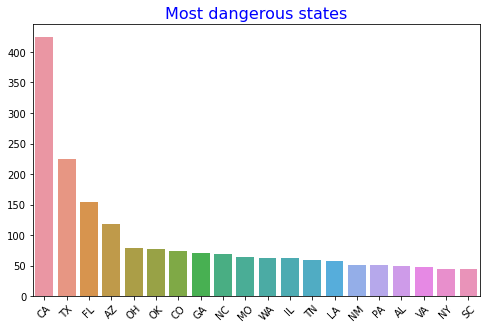

In [236]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(8,5))

ax = sns.barplot(x=dangerous_states, y=state_count)
ax.set_title("Most dangerous states", fontsize=16, color='b')
plt.xticks(rotation=45)

plt.show()

In [237]:
state_df = kill.loc[kill["state"].isin(dangerous_states)]
state_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False


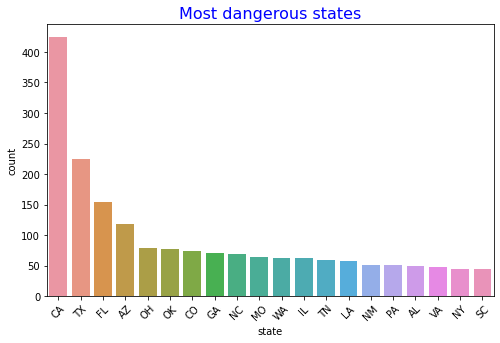

In [238]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,5))

sns.countplot(x='state', data=state_df, order=dangerous_states)
ax.set_title("Most dangerous states", fontsize=16, color='b')
plt.xticks(rotation=45)

plt.show()

## 4: Plot Having mental ilness or not for killed people

In [239]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [240]:
illness = kill['signs_of_mental_illness'].value_counts()
illness

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

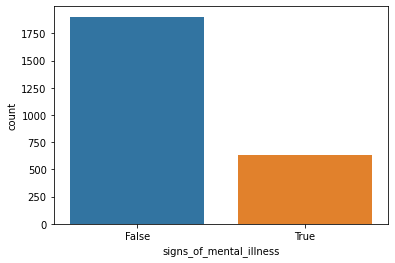

In [241]:
# with seaborn

sns.countplot(kill['signs_of_mental_illness']);

## 5: Plot number of Threat Types

In [242]:
threads_freq = kill['threat_level'].value_counts()
threads_freq

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

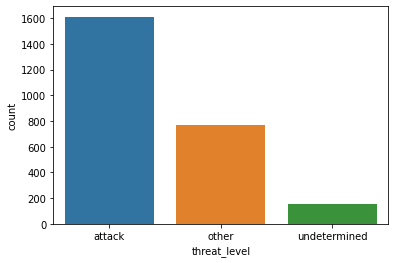

In [243]:
sns.countplot(kill['threat_level']);

## 6: Plot number of Flee Types

In [244]:
flee_freq = kill['flee'].value_counts()
flee_freq

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

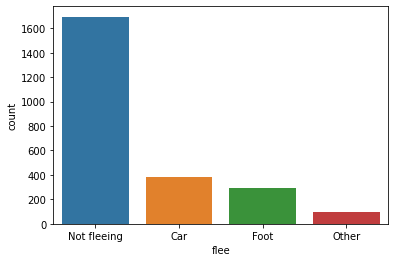

In [245]:
# with seaborn

sns.countplot(kill['flee']);